In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
import joblib
import os
from warnings import filterwarnings
filterwarnings("ignore")

## Veri Seti Yükleme

In [2]:
df = pd.read_csv("temizlenmis_otomobil_verisi.csv")

In [3]:
df_eski = df.copy()

In [4]:
df.head()

,marka,seri,model,yil,kilometre,vites_tipi,yakit_tipi,kasa_tipi,renk,motor_hacmi,motor_gucu,degisen_sayisi,boyali_sayisi,kimden,fiyat
0,Lexus,ES,300h Business Plus,2023,43000,Otomatik,Benzin,Sedan,Siyah,2250,213,1,1,Galeriden,4950000
1,Lexus,LS,500h Exclusive,2021,23665,Otomatik,Benzin,Sedan,Siyah,3250,363,0,0,Galeriden,9000000
2,Lexus,GS,200t F Sport,2016,90500,Otomatik,Benzin,Sedan,Beyaz,1900,238,0,0,Galeriden,2745000
3,Infiniti,I30,3.0,1996,230000,Otomatik,LPG & Benzin,Sedan,Yeşil,2988,190,0,7,Sahibinden,225000
4,Infiniti,I30,3.0,1996,298000,Otomatik,LPG & Benzin,Sedan,Yeşil,2988,190,0,7,Sahibinden,475000


## Veri Seti Karıştırma

In [5]:
df = shuffle(df, random_state=58).reset_index(drop=True)

In [6]:
df.head()

,marka,seri,model,yil,kilometre,vites_tipi,yakit_tipi,kasa_tipi,renk,motor_hacmi,motor_gucu,degisen_sayisi,boyali_sayisi,kimden,fiyat
0,Honda,Civic,1.6 i-VTEC ECO Elegance,2020,46200,Yarı Otomatik,LPG & Benzin,Sedan,Beyaz,1597,125,0,0,Sahibinden,1500000
1,Citroen,C-Elysee,1.6 HDi Shine,2017,160000,Düz,Dizel,Sedan,Beyaz,1560,93,0,0,Galeriden,699750
2,Peugeot,207,1.4 HDi Trendy,2008,221000,Düz,Dizel,Hatchback/5,Gri (Gümüş),1398,71,0,0,Galeriden,529750
3,Renault,Fluence,1.5 dCi Touch Plus,2015,190000,Yarı Otomatik,Dizel,Sedan,Beyaz,1461,110,0,7,Sahibinden,720000
4,Tofaş,Doğan,SLX,1996,199999,Düz,Benzin,Sedan,Yeşil,1581,83,0,0,Galeriden,175000


## Kategorik Verileri Sayısallaştırma

In [7]:
df.nunique()

,0
marka,56
seri,448
model,2946
yil,55
kilometre,5193
vites_tipi,3
yakit_tipi,5
kasa_tipi,10
renk,24
motor_hacmi,272


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48969 entries, 0 to 48968
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   marka           48969 non-null  object
 1   seri            48969 non-null  object
 2   model           48969 non-null  object
 3   yil             48969 non-null  int64 
 4   kilometre       48969 non-null  int64 
 5   vites_tipi      48969 non-null  object
 6   yakit_tipi      48969 non-null  object
 7   kasa_tipi       48969 non-null  object
 8   renk            48969 non-null  object
 9   motor_hacmi     48969 non-null  int64 
 10  motor_gucu      48969 non-null  int64 
 11  degisen_sayisi  48969 non-null  int64 
 12  boyali_sayisi   48969 non-null  int64 
 13  kimden          48969 non-null  object
 14  fiyat           48969 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


In [9]:
kategorik_sutunlar = df.select_dtypes(include="object")

In [10]:
kategorik_sutunlar.columns

Index(['marka', 'seri', 'model', 'vites_tipi', 'yakit_tipi', 'kasa_tipi',
       'renk', 'kimden'],
      dtype='object')

In [11]:
kategorik_sutunlar.nunique()

,0
marka,56
seri,448
model,2946
vites_tipi,3
yakit_tipi,5
kasa_tipi,10
renk,24
kimden,4


In [12]:
kodlanmis = {}
for sutun in kategorik_sutunlar:
    le = LabelEncoder()
    df[sutun] = le.fit_transform(df[sutun])
    kodlanmis[sutun] = le

In [13]:
kodlanmis

{'marka': LabelEncoder(),
 'seri': LabelEncoder(),
 'model': LabelEncoder(),
 'vites_tipi': LabelEncoder(),
 'yakit_tipi': LabelEncoder(),
 'kasa_tipi': LabelEncoder(),
 'renk': LabelEncoder(),
 'kimden': LabelEncoder()}

In [14]:
joblib.dump(kodlanmis, "kodlanmis.pkl")

['kodlanmis.pkl']

In [15]:
df.head()

,marka,seri,model,yil,kilometre,vites_tipi,yakit_tipi,kasa_tipi,renk,motor_hacmi,motor_gucu,degisen_sayisi,boyali_sayisi,kimden,fiyat
0,20,164,1684,2020,46200,2,4,8,2,1597,125,0,0,2,1500000
1,9,125,1347,2017,160000,0,1,8,2,1560,93,0,0,0,699750
2,39,22,622,2008,221000,0,1,3,7,1398,71,0,0,0,529750
3,43,216,1075,2015,190000,2,1,8,2,1461,110,0,7,2,720000
4,52,187,2907,1996,199999,0,0,8,21,1581,83,0,0,0,175000


In [16]:
for sutun in kategorik_sutunlar:
    print(sutun, df[sutun].unique())

marka [20  9 39 43 52 35 25 53 21 18 17 38 46 11  0 26 54  7 47 34 55  2 27 37
  3 44 50 12 10 41 32 42 36  8 19 51 28 14 33 15 13 23 45  6 49 48 29  1
 22 16 30  4 24  5 40 31]
seri [164 125  22 216 187 188 124 423 290 172  38 447  95 217 311 174 105 181
 441  41 257  40 233 340 314 114 385 391 271  20  67 109 212 245 399  70
 346 126 135  87 360 234 195  97 240 341 261 357 194 156 306 387 303 414
  62 248 318 325 163 199  73 213 293 445  45 221 132 165 386 274 349 358
 178 171 345  90 129 312 209  65 297  89 112 295 249 422  88 375  10 168
 421 166 322 144 374   0  98 228  34  72 276 415 173  85  52 122  39 394
  36 263 275 193 157 130 335 342 243 186 373 398 250 435 220 101 324  23
 267  96 361 140 230 284 198 317 136  15 337 231 288 121 102 308 161 429
 406 410  27 323 291 104 370 431 442 404 440 113 106 133  92  33 153 251
 444 390  21 116 197  49  16 255  99  53 201 210  56  94 115 353 392  35
  55 170 238 244 289 377  25 331  78 348 256  31   4 321 128 403 366 315
 378 253 179 3

In [17]:
for sutun in kategorik_sutunlar:
    print(sutun, df_eski[sutun].unique())

marka ['Lexus' 'Infiniti' 'Ikco' 'Buick' 'Isuzu' 'Lada' 'Daewoo' 'BMW' 'Ferrari'
 'Geely' 'Chery' 'Chrysler' 'Alfa Romeo' 'Cadillac' 'Aston Martin'
 'Lincoln' 'Lotus' 'Kia' 'Ford' 'Dodge' 'Hyundai' 'Fiat' 'Lancia' 'Honda'
 'Jaguar' 'Daihatsu' 'Chevrolet' 'Cupra' 'Maserati' 'Dacia' 'Audi'
 'Citroen' 'DS Automobiles' 'Mazda' 'Mercedes - Benz' 'MINI' 'Mitsubishi'
 'Pontiac' 'Nissan' 'Opel' 'Peugeot' 'Porsche' 'Proton' 'Saab' 'Rover'
 'Seat' 'Smart' 'Skoda' 'Subaru' 'Suzuki' 'Tata' 'Renault' 'Tofaş'
 'Toyota' 'Volkswagen' 'Volvo']
seri ['ES' 'LS' 'GS' 'I30' 'Q50' 'Samand' 'M' 'Regal' 'G' 'Q60' 'Gemini' 'Q30'
 'Samara' 'IS' 'Vega' 'Kalina' 'Lanos' 'Nubira' 'Matiz' 'Leganza'
 'Chairman' 'Nexia' 'Espero' 'Tico' '5 Serisi' '2 Serisi' '1 Serisi'
 '3 Serisi' '7 Serisi' 'i Serisi' '360' 'Echo' 'Emgrand' 'FC' 'Familia'
 'Alia' 'Kimo' 'Niche' '300 C' '300 M' 'Sebring' 'Stratus' 'LHS'
 'Concorde' '156' 'Giulietta' '147' 'MiTo' 'Giulia' '159' '145' 'GT' '146'
 'Eldorado' 'Fleetwood' 'Seville' 'DeVill

## Veri Seti Bağımlı ve Bağımsız Ayrılaması

In [18]:
X = df.drop("fiyat", axis=1)
y = df["fiyat"]

In [19]:
X.shape

(48969, 14)

In [20]:
y.shape

(48969,)

# Makine Öğrenmesi Modelleri

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
print("X_train boyutu: ", X_train.shape)
print("X_test boyutu: ", X_test.shape)
print("y_train boyutu", y_train.shape)
print("y_test boyutu", y_test.shape)

X_train boyutu:  (39175, 14)
X_test boyutu:  (9794, 14)
y_train boyutu (39175,)
y_test boyutu (9794,)


In [23]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [24]:
X_train.sample(random_state=42)

,marka,seri,model,yil,kilometre,vites_tipi,yakit_tipi,kasa_tipi,renk,motor_hacmi,motor_gucu,degisen_sayisi,boyali_sayisi,kimden
26598,7,114,364,2012,194000,0,1,3,2,1248,75,0,6,2


In [25]:
scaler.transform(X_train.sample(random_state=42))

array([[-1.31571748, -0.82413563, -1.16686437,  0.19492572,  0.05291496,
        -0.84025976, -0.13513948, -1.06562635, -0.92690548, -0.93010217,
        -0.96307685, -0.54548681,  1.300818  ,  0.96186073]])

### K-Fold Belirleme

In [26]:
kf = KFold(n_splits=10)

## 1-KNN Modeli

In [27]:
knn = KNeighborsRegressor()

In [28]:
knn_params = {
    "n_neighbors": range(3, 22),
    "weights": ["uniform", "distance"],
    "p": [1, 2]  # p=1: Manhattan, p=2: Euclidean
}

### KNN Grid Search

In [29]:
knn_grid = GridSearchCV(estimator=knn, param_grid=knn_params, cv=kf)
knn_grid.fit(X_train_std, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(3, 22), 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

KNeighborsRegressor(n_neighbors=4, p=1, weights='distance')

In [30]:
print("KNN Grid Search Best Parameters: ", knn_grid.best_params_)
print("KNN Grid Search Best Accuracy: ", knn_grid.best_score_)

KNN Grid Search Best Parameters:  {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
KNN Grid Search Best Accuracy:  0.9290913326189791


In [31]:
y_pred_knn_grid = knn_grid.predict(X_test_std)

In [32]:
r2_knn_grid = r2_score(y_test, y_pred_knn_grid)
mse_knn_grid = mean_squared_error(y_test, y_pred_knn_grid)
mae_knn_grid = mean_absolute_error(y_test, y_pred_knn_grid)
rmse_knn_grid = root_mean_squared_error(y_test, y_pred_knn_grid)
print("Test seti R² skoru:", r2_knn_grid)
print("Test seti MAE skoru:", mae_knn_grid)
print("Test seti MSE skoru:", mse_knn_grid)
print("Test seti RMSE skoru:", rmse_knn_grid)

Test seti R² skoru: 0.9261413601720977
Test seti MAE skoru: 97690.03602352172
Test seti MSE skoru: 42953766951.479
Test seti RMSE skoru: 207252.90577330635


### KNN Random Search

In [33]:
knn_random = RandomizedSearchCV(estimator=knn, param_distributions=knn_params, n_iter=30, cv=kf)
knn_random.fit(X_train_std, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=KNeighborsRegressor(), n_iter=30,
                   param_distributions={'n_neighbors': range(3, 22),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']})

In [34]:
print("KNN Random Search Best Parameters: ", knn_random.best_params_)
print("KNN Random Search Best Accuracy: ", knn_random.best_score_)

KNN Random Search Best Parameters:  {'weights': 'distance', 'p': 1, 'n_neighbors': 6}
KNN Random Search Best Accuracy:  0.927226059932195


In [35]:
y_pred_knn_random = knn_random.predict(X_test_std)

In [36]:
r2_knn_random = r2_score(y_test, y_pred_knn_random)
mae_knn_random = mean_absolute_error(y_test, y_pred_knn_random)
mse_knn_random = mean_squared_error(y_test, y_pred_knn_random)
rmse_knn_random = root_mean_squared_error(y_test, y_pred_knn_random)
print("Test seti R² skoru:", r2_knn_random)
print("Test seti MAE skoru:", mae_knn_random)
print("Test seti MSE skoru:", mse_knn_random)
print("Test seti RMSE skoru:", rmse_knn_random)

Test seti R² skoru: 0.9277982425247516
Test seti MAE skoru: 95756.61313810489
Test seti MSE skoru: 41990178417.92698
Test seti RMSE skoru: 204915.05171150062


### Model Kaydetme

In [37]:
joblib.dump(knn_grid, "knn_grid.pkl")

['knn_grid.pkl']

In [38]:
joblib.dump(knn_random, "knn_random.pkl")

['knn_random.pkl']

## 2-Decision Tree Modeli

In [39]:
tree = DecisionTreeRegressor()

In [40]:
tree_params = {
    "max_depth": [5, 10, 15, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"]
}

### DT Grid Search

In [41]:
tree_grid = GridSearchCV(estimator=tree, param_grid=tree_params, cv=kf)
tree_grid.fit(X_train_std, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [42]:
print("DT Grid Search Best Parameters: ", tree_grid.best_params_)
print("DT Grid Search Best Accuracy: ", tree_grid.best_score_)

DT Grid Search Best Parameters:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
DT Grid Search Best Accuracy:  0.8955715519383493


In [43]:
y_pred_tree_grid = tree_grid.predict(X_test_std)

In [44]:
r2_tree_grid = r2_score(y_test, y_pred_tree_grid)
mae_tree_grid = mean_absolute_error(y_test, y_pred_tree_grid)
mse_tree_grid = mean_squared_error(y_test, y_pred_tree_grid)
rmse_tree_grid = root_mean_squared_error(y_test, y_pred_tree_grid)
print("Test seti R² skoru:", r2_tree_grid)
print("Test seti MAE skoru:", mae_tree_grid)
print("Test seti MSE skoru:", mse_tree_grid)
print("Test seti RMSE skoru:", rmse_tree_grid)

Test seti R² skoru: 0.8906922297526579
Test seti MAE skoru: 110575.92649770858
Test seti MSE skoru: 63569820675.419426
Test seti RMSE skoru: 252130.56275552837


### DT Random Search

In [45]:
tree_random = RandomizedSearchCV(estimator=tree, param_distributions=tree_params, n_iter=30, cv=kf)
tree_random.fit(X_train_std, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=DecisionTreeRegressor(), n_iter=30,
                   param_distributions={'max_depth': [5, 10, 15, 20, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]})

In [46]:
print("DT Random Search Best Parameters: ", tree_random.best_params_)
print("DT Random Search Best Accuracy: ", tree_random.best_score_)

DT Random Search Best Parameters:  {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20}
DT Random Search Best Accuracy:  0.8972610587358778


In [47]:
y_pred_tree_random = tree_random.predict(X_test_std)

In [48]:
r2_tree_random = r2_score(y_test, y_pred_tree_random)
mae_tree_random = mean_absolute_error(y_test, y_pred_tree_random)
mse_tree_random = mean_squared_error(y_test, y_pred_tree_random)
rmse_tree_random = root_mean_squared_error(y_test, y_pred_tree_random)
print("Test seti R² skoru:", r2_tree_random)
print("Test seti MAE skoru:", mae_tree_random)
print("Test seti MSE skoru:", mse_tree_random)
print("Test seti RMSE skoru:", rmse_tree_random)

Test seti R² skoru: 0.8862824743002385
Test seti MAE skoru: 109532.74933592319
Test seti MSE skoru: 66134390080.6724
Test seti RMSE skoru: 257166.07490233312


### Model Kaydetme

In [49]:
joblib.dump(tree_grid, "tree_grid.pkl")

['tree_grid.pkl']

In [50]:
joblib.dump(tree_random, "tree_random.pkl")

['tree_random.pkl']

## 3-Random Forest Modeli

In [51]:
random_forest = RandomForestRegressor()

In [52]:
random_forest_params = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ['sqrt', 'log2']
}

### RF Grid Search

In [53]:
random_forest_grid = GridSearchCV(estimator=random_forest, param_grid=random_forest_params, cv=kf)
random_forest_grid.fit(X_train_std, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

In [54]:
print("Random Forest Grid Search Best Parameters: ", random_forest_grid.best_params_)
print("Random Forest Grid Search Best Accuracy: ", random_forest_grid.best_score_)

Random Forest Grid Search Best Parameters:  {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Grid Search Best Accuracy:  0.952082530544013


In [55]:
y_pred_random_forest_grid = random_forest_grid.predict(X_test_std)

In [56]:
r2_random_forest_grid = r2_score(y_test, y_pred_random_forest_grid)
mae_random_forest_grid = mean_absolute_error(y_test, y_pred_random_forest_grid)
mse_random_forest_grid = mean_squared_error(y_test, y_pred_random_forest_grid)
rmse_random_forest_grid = root_mean_squared_error(y_test, y_pred_random_forest_grid)
print("Test seti R² skoru:", r2_random_forest_grid)
print("Test seti MAE skoru:", mae_random_forest_grid)
print("Test seti MSE skoru:", mse_random_forest_grid)
print("Test seti RMSE skoru:", rmse_random_forest_grid)

Test seti R² skoru: 0.9519197950658225
Test seti MAE skoru: 71183.33357280992
Test seti MSE skoru: 27961873147.59908
Test seti RMSE skoru: 167218.04073603745


### RF Random Search

In [57]:
random_forest_random = RandomizedSearchCV(estimator=random_forest, param_distributions=random_forest_params, n_iter=20, cv=kf)
random_forest_random.fit(X_train_std, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [10, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]})

In [58]:
print("Random Forest Random Search Best Parameters: ", random_forest_random.best_params_)
print("Random Forest Random Search Best Accuracy: ", random_forest_random.best_score_)

Random Forest Random Search Best Parameters:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Random Forest Random Search Best Accuracy:  0.9510794848438866


In [59]:
y_pred_random_forest_random = random_forest_random.predict(X_test_std)

In [60]:
r2_random_forest_random = r2_score(y_test, y_pred_random_forest_random)
mae_random_forest_random = mean_absolute_error(y_test, y_pred_random_forest_random)
mse_random_forest_random = mean_squared_error(y_test, y_pred_random_forest_random)
rmse_random_forest_random = root_mean_squared_error(y_test, y_pred_random_forest_random)
print("Test seti R² skoru:", r2_random_forest_random)
print("Test seti MAE skoru:", mae_random_forest_random)
print("Test seti MSE skoru:", mse_random_forest_random)
print("Test seti RMSE skoru:", rmse_random_forest_random)

Test seti R² skoru: 0.9523207185524033
Test seti MAE skoru: 70913.10290136526
Test seti MSE skoru: 27728709173.173153
Test seti RMSE skoru: 166519.39578671654


### Model Kaydetme

In [61]:
from google.colab import drive
drive.mount('/content/drive')

save_dir = "/content/drive/MyDrive/model_kayit"
os.makedirs(save_dir, exist_ok=True)

Mounted at /content/drive


In [62]:
joblib.dump(random_forest_grid, os.path.join(save_dir, "random_forest_grid.pkl"))

['/content/drive/MyDrive/model_kayit/random_forest_grid.pkl']

In [63]:
joblib.dump(random_forest_random, os.path.join(save_dir, "random_forest_random.pkl"))

['/content/drive/MyDrive/model_kayit/random_forest_random.pkl']

## 4-XGBoost Model

In [64]:
xgb = XGBRegressor()

In [65]:
xgb_params = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7, 10],
    "n_estimators": [100, 200, 300, 500]
}

### XGBoost Grid Search

In [66]:
xgb_grid = GridSearchCV(estimator=xgb, param_grid=xgb_params, cv=kf)
xgb_grid.fit(X_train_std, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,...
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 200, 300, 500]})

In [67]:
print("XGB Grid Search Best Parameters: ", xgb_grid.best_params_)
print("XGB GRİD Search Best Accuracy: ", xgb_grid.best_score_)

XGB Grid Search Best Parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}
XGB GRİD Search Best Accuracy:  0.9561911642551422


In [68]:
y_pred_xgb_grid = xgb_grid.predict(X_test_std)

In [69]:
r2_xgb_grid = r2_score(y_test, y_pred_xgb_grid)
mae_xgb_grid = mean_absolute_error(y_test, y_pred_xgb_grid)
mse_xgb_grid = mean_squared_error(y_test, y_pred_xgb_grid)
rmse_xgb_grid = root_mean_squared_error(y_test, y_pred_xgb_grid)
print("Test seti R² skoru:", r2_xgb_grid)
print("Test seti MAE skoru:", mae_xgb_grid)
print("Test seti MSE skoru:", mse_xgb_grid)
print("Test seti RMSE skoru:", rmse_xgb_grid)

Test seti R² skoru: 0.9636106491088867
Test seti MAE skoru: 70592.5859375
Test seti MSE skoru: 21162840064.0
Test seti RMSE skoru: 145474.53125


### XGBoost Random Search

In [70]:
xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_params, n_iter=20, cv=kf)
xgb_random.fit(X_train_std, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy...
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=20,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300, 500]})

In [71]:
print("XGB Random Search Best Parameters: ", xgb_random.best_params_)
print("XGB Random Search Best Accuracy: ", xgb_random.best_score_)

XGB Random Search Best Parameters:  {'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.1}
XGB Random Search Best Accuracy:  0.9557934463024139


In [72]:
y_pred_xgb_random = xgb_random.predict(X_test_std)

In [73]:
r2_xgb_random = r2_score(y_test, y_pred_xgb_random)
mae_xgb_random = mean_absolute_error(y_test, y_pred_xgb_random)
mse_xgb_random = mean_squared_error(y_test, y_pred_xgb_random)
rmse_xgb_random = root_mean_squared_error(y_test, y_pred_xgb_random)
print("Test seti R² skoru:", r2_xgb_random)
print("Test seti MAE skoru:", mae_xgb_random)
print("Test seti MSE skoru:", mse_xgb_random)
print("Test seti RMSE skoru:", rmse_xgb_random)

Test seti R² skoru: 0.9626480340957642
Test seti MAE skoru: 66878.5078125
Test seti MSE skoru: 21722667008.0
Test seti RMSE skoru: 147386.109375


### Model Kaydetme

In [74]:
joblib.dump(xgb_grid, "xgb_grid.pkl")

['xgb_grid.pkl']

In [75]:
joblib.dump(xgb_random, "xgb_random.pkl")

['xgb_random.pkl']

## 5-Lineer Regresyon Modeli

In [76]:
lineer_model = LinearRegression()

In [77]:
lineer_model.fit(X_train_std, y_train)

LinearRegression()

### Lineer Model Eğitim Skoru

In [92]:
lm_train_score = lineer_model.score(X_train_std, y_train)
lm_train_score

0.67744174216338

In [78]:
y_pred_lineer_model = lineer_model.predict(X_test_std)

In [79]:
r2_lineer_model = r2_score(y_test, y_pred_lineer_model)
mae_lineer_model = mean_absolute_error(y_test, y_pred_lineer_model)
mse_lineer_model = mean_squared_error(y_test, y_pred_lineer_model)
rmse_lineer_model = root_mean_squared_error(y_test, y_pred_lineer_model)
print("Test seti R2 skoru: ", r2_lineer_model)
print("Test seti MAE skoru: ", mae_lineer_model)
print("Test seti MSE skoru: ", mse_lineer_model)
print("Test seti RMSE skoru: ", rmse_lineer_model)

Test seti R2 skoru:  0.6780476980641228
Test seti MAE skoru:  236671.0642665492
Test seti MSE skoru:  187236918782.54062
Test seti RMSE skoru:  432708.81523553526


### Model Katsayıları

In [80]:
lineer_model.coef_

array([  32251.81656448,   11204.91579531,   98163.91301539,
        224525.01030369, -154179.77617793,    1686.20405742,
          8815.32851887,  -19127.48755609,   38882.34935625,
        -45347.40619639,  423286.99160747,  -30140.56571615,
        -35109.21104678,  -37817.19117226])

### Model Sabiti

In [81]:
lineer_model.intercept_

np.float64(802125.2505169103)

$$ \hat{y} = 32251.82*marka + 11204.92*seri + 98163.91*model + 224525.01*yil - 154179.78*kilometre + 1686.20*vites\_tipi + 8815.33*yakit\_tipi - 19127.49*kasa\_tipi + 38882.35 * renk - 45347.41*motor\_hacmi + 423286.99*motor\_gucu - 30140.57*degisen\_sayisi - 35109.21*boyali\_sayisi - 37817.19*kimden + 802125.25$$

### Model Kaydetme

In [82]:
joblib.dump(lineer_model, "lineer_model.pkl")

['lineer_model.pkl']

## 6-ANN Model

In [83]:
model = Sequential()

In [84]:
model = Sequential()
model.add(Dense(256, activation="relu", input_shape=(X_train_std.shape[1],)))
model.add(Dropout(0.4))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,057 (176.00 KB)

 Trainable params: 45,057 (176.00 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

In [86]:
history = model.fit(
    x=X_train_std, y=y_train,
    validation_split=0.1,
    epochs=300,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/300
551/551 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1022431068160.0000 - val_loss: 262031638528.0000
Epoch 2/300
551/551 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 193929248768.0000 - val_loss: 194725740544.0000
Epoch 3/300
551/551 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 154122125312.0000 - val_loss: 178115100672.0000
Epoch 4/300
551/551 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 139757436928.0000 - val_loss: 169720561664.0000
Epoch 5/300
551/551 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 120692137984.0000 - val_loss: 164848533504.0000
Epoch 6/300
551/551 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 125670998016.0000 - val_loss: 162245066752.0000
Epoch 7/300
551/551 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 126988206080.0000 - val_loss: 158550638592.0000
Epoch 8/300
551/551 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 129636417536.0000 - val_loss: 155756183552.0000
Epoch 9/300
551/551 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 121265602560.0000 - val_loss: 152741707776.0000
Epoch 10/300
551/5

In [87]:
y_pred_ann = model.predict(X_test_std)

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [88]:
r2_ann = r2_score(y_test, y_pred_ann)
mae_ann = mean_absolute_error(y_test, y_pred_ann)
mse_ann = mean_squared_error(y_test, y_pred_ann)
rmse_ann = root_mean_squared_error(y_test, y_pred_ann)
print("Test seti R² skoru:", r2_ann)
print("Test seti MAE skoru:", mae_ann)
print("Test seti MSE skoru:", mse_ann)
print("Test seti RMSE skoru:", rmse_ann)

Test seti R² skoru: 0.8585957288742065
Test seti MAE skoru: 129265.1171875
Test seti MSE skoru: 82236080128.0
Test seti RMSE skoru: 286768.34375


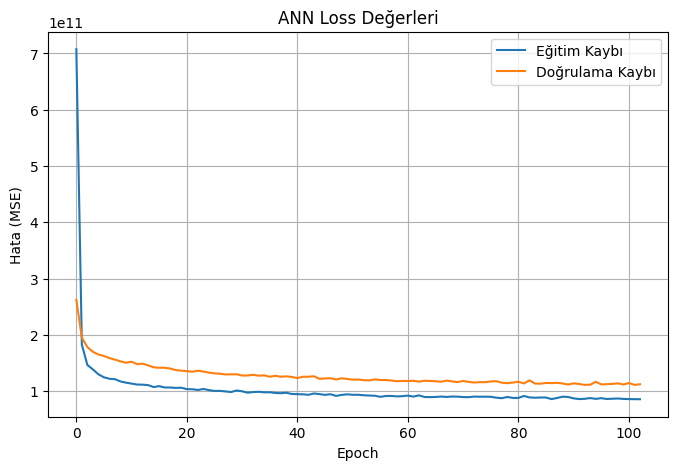

In [89]:
plt.figure(figsize=(8,5))
plt.plot(history.history["loss"], label="Eğitim Kaybı")
plt.plot(history.history["val_loss"], label="Doğrulama Kaybı")
plt.xlabel("Epoch")
plt.ylabel("Hata (MSE)")
plt.title("ANN Loss Değerleri")
plt.legend()
plt.grid(True)
#plt.savefig("en_iyi_ann.png", dpi=300)
plt.show()

### Model Kaydetme

In [90]:
model.save("ann_model.keras")

# Model Sonuçlarını Karşılaştırma

In [115]:
kolonlar = ["GridCV Train", "GridCV Test", "RandomCV Train", "RandomCV Test"]
skorlar = {
    "KNN":[knn_grid.best_score_, r2_knn_grid, knn_random.best_score_, r2_knn_random],
    "DT":[tree_grid.best_score_, r2_tree_grid, tree_random.best_score_, r2_tree_random],
    "RF":[random_forest_grid.best_score_, r2_random_forest_grid, random_forest_random.best_score_, r2_random_forest_random],
    "XGB":[xgb_grid.best_score_, r2_xgb_grid, xgb_random.best_score_, r2_xgb_random],
    "LM":[lm_train_score, r2_lineer_model, None, None],
    "ANN":[None, r2_ann, None, None]
    }

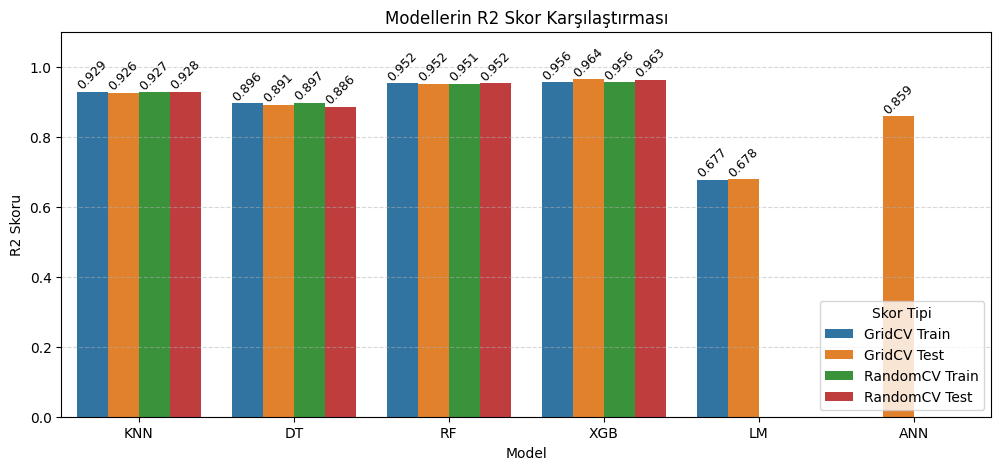

In [127]:
df = pd.DataFrame.from_dict(skorlar, orient="index", columns=kolonlar)
df.index.name = "Model"
df = df.reset_index()

df_long = df.melt(id_vars="Model", var_name="Skor Tipi", value_name="R2 Skoru")

plt.figure(figsize=(12, 5))
ax = sns.barplot(data=df_long, x="Model", y="R2 Skoru", hue="Skor Tipi")

for p in ax.patches:
    height = p.get_height()
    if height is not None and not pd.isna(height) and height > 0.01:
        ax.annotate(f"{height:.3f}",
                    (p.get_x() + p.get_width() / 2., height),
                    ha="center", va="bottom", fontsize=9, rotation=45)

plt.title("Modellerin R2 Skor Karşılaştırması")
plt.ylim(0, 1.1)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Skor Tipi")
plt.savefig("model_skorlari.png", dpi=300)
plt.show()